In [103]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import gzip
from collections import defaultdict
import random

from sklearn.feature_extraction.text import TfidfVectorizer
import urllib
import scipy.optimize
from collections import defaultdict # Dictionaries with default values
import nltk
import string
from nltk.stem.porter import *
from sklearn import linear_model
import ast

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support

from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kennnnnnn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [104]:
rent = pd.read_csv('clean.csv')
rent.review_summary = rent.review_summary.fillna('')
rent.review_text = rent.review_text.fillna('')

In [105]:
rent = rent.sample(frac=1).reset_index(drop=True)
train = rent[:180000]
valid = rent[180000:]

In [210]:
y_train = train.fit
y_valid = valid.fit

In [111]:
rent

,fit,user_id,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,bust_num,bust_char
0,fit,105332,126335,21.7680,8.0,party,This dress was beautiful and made me feel like...,pear,I got so many compliments on this dress!,long,6.83,19.754825,3.583519,"December 14, 2015",36,c
1,fit,655139,134393,-8.6165,8.0,wedding,"It was a little large in the bust area, but it...",straight & narrow,I loved the shine and the fabric.,long,1.75,-4.245175,3.555348,"June 13, 2015",36,c
2,fit,104746,573147,-5.4420,8.0,formal affair,This dress was so pretty ugh. I honestly didn'...,straight & narrow,"Beautiful dress, wore to my junior prom.",long,4.29,-7.245175,2.944439,"May 23, 2016",32,c
3,fit,880427,1418138,11.7910,10.0,wedding,"It fit really well, the length was great, and ...",hourglass,I got so many compliments and its has pockets!,long,6.83,7.754825,3.295837,"July 26, 2017",34,c
4,large,287738,141761,5.4420,10.0,wedding,I rented this dress last minute for wedding up...,athletic,Weekend wedding with some friends. I felt very...,long,-5.87,-4.245175,3.401197,"April 14, 2016",36,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,780049,349579,-1.8140,10.0,vacation,i wore this dress on vacation to the beach. It...,other,fun and flirty,long,6.83,-8.245175,3.555348,"April 3, 2017",36,c
192540,large,354118,126335,10.4305,8.0,party,This dress ran a bit large. I usually wear a s...,hourglass,This dress was so much fun for my bachelorette...,long,9.37,7.754825,3.401197,"May 7, 2016",34,d
192541,fit,602351,365727,5.8955,10.0,work,Love the sleeves! Could use some accessorizing,hourglass,"Easy, great material that doesn't easily wrink...",long,4.29,1.754825,3.367296,"June 19, 2017",36,b
192542,fit,788404,2668216,-3.1745,8.0,everyday,I wore this top for a fun girls' day out with ...,athletic,Easy with a bit of fun edge.,top_short,1.75,-4.245175,3.555348,"May 27, 2016",34,b


In [113]:
rented_for_one= pd.get_dummies(rent['rented for'], prefix='rented for')
category_one = pd.get_dummies(rent['category'], prefix='category')
bust_char_one = pd.get_dummies(rent['bust_char'], prefix='bust_char')
body_type_one = pd.get_dummies(rent['body type'], prefix='body type')

In [114]:
#rented_for
# rented_for_train = rented_for_one[:180000].to_numpy()
# rented_for_valid = rented_for_one[180000:].to_numpy()

#category
# category_one_train = category_one[:180000].to_numpy()
# category_one_valid = category_one[180000:].to_numpy()

#bust_num
# bust_num_train = train[['bust_num']].to_numpy()
# bust_num_valid = valid[['bust_num']].to_numpy()

#bust_char
# bust_char_for_train = bust_char_one[:180000].to_numpy()
# bust_char_for_valid = bust_char_one[180000:].to_numpy()

#body_type
# body_type_train = body_type_one[:180000].to_numpy()
# body_type_valid = body_type_one[180000:].to_numpy()

#age
# age_train = train[['age']].to_numpy()
# age_valid = valid[['age']].to_numpy()

# size
# size_train = train[['size']].to_numpy()
# size_valid = valid[['size']].to_numpy()

# #weight
# weight_train = train[['weight']].to_numpy()
# weight_valid = valid[['weight']].to_numpy()

# #height
# height_train = train[['height']].to_numpy()
# height_valid = valid[['height']].to_numpy()

# #rating
rating_train = train[['rating']].to_numpy()
rating_valid = valid[['rating']].to_numpy()


In [115]:
tfidf = TfidfVectorizer(stop_words = 'english', sublinear_tf = True, max_features = 1000, tokenizer = word_tokenize) 
Train_X_summary = tfidf.fit_transform(train.review_summary).toarray()

In [116]:
tfidf2 = TfidfVectorizer(stop_words = 'english', sublinear_tf = True, max_features = 1000, tokenizer = word_tokenize) 
Train_X_text = tfidf2.fit_transform(train.review_text).toarray()

In [117]:
combined_text = np.hstack((Train_X_summary, Train_X_text))

In [118]:
other_feature = rating_train

In [119]:
def combine_feature(numpy_arrays):
    res = []
    for i in numpy_arrays:
        res += list(i.T)
    return np.array(res).T

In [120]:
final_list = combine_feature([combined_text,rating_train])

In [122]:
combined_text.shape

(180000, 2000)

In [123]:
other_feature.shape

(180000, 1)

In [125]:
Valid_X_summary = tfidf.transform(valid.review_summary).toarray()

In [126]:
Valid_X_text = tfidf2.transform(valid.review_text).toarray()

In [127]:
combined_text_valid = np.hstack((Valid_X_summary, Valid_X_text))

In [128]:
final_valid_list = combine_feature([combined_text_valid,rating_valid])

In [130]:
final_valid_list.shape

(12544, 2001)

In [132]:
final_feature = final_list

In [133]:
clf = LogisticRegression()
clf.fit(final_feature, y_train)

C:\Users\Kennnnnnn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
clf.score(final_valid_list, y_valid)

0.8143335459183674

In [135]:
prdicted = clf.predict(final_valid_list)

In [138]:
from sklearn.metrics import confusion_matrix

In [151]:
confusion_matrix_result = confusion_matrix(prdicted,y_valid,labels = ['small','fit','large'])

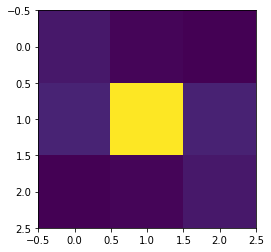

In [152]:
plt.imshow(confusion_matrix_result)

In [150]:
import seaborn as sn

In [159]:
tb_confusion = pd.DataFrame(confusion_matrix_result,['predict_small','predict_fit','predict_large'],['small','fit','large'])

In [142]:
from sklearn.metrics import plot_confusion_matrix

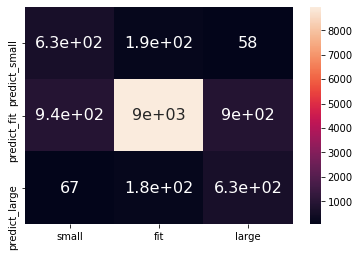

In [161]:
sn.heatmap(tb_confusion, annot=True, annot_kws={"size": 16}) 

## small

In [160]:
tb_confusion

,small,fit,large
predict_small,630,192,58
predict_fit,937,8957,896
predict_large,67,179,628


In [183]:
TP_small = 630
TN_small = 8957+896+179+628
FP_small = 192 + 58
FN_small = 937 +67
Precision_small = TP_small / (TP_small + FP_small)
Recall_small = TP_small /(TP_small + FN_small)
F1_score_small = 2*(Precision_small *Recall_small) / (Precision_small + Recall_small)

In [184]:
TP_small,TN_small,FP_small,FN_small

(630, 10660, 250, 1004)

In [185]:
Precision_small,Recall_small,F1_score_small

(0.7159090909090909, 0.38555691554467564, 0.5011933174224343)

## Fit

In [190]:
tb_confusion

,small,fit,large
predict_small,630,192,58
predict_fit,937,8957,896
predict_large,67,179,628


In [187]:
TP_fit = 8957
TN_fit = 630 +628 +58 +67
FP_fit = 937 + 896
FN_fit = 192 + 179
Precision_fit = TP_fit / (TP_fit + FP_fit)
Recall_fit = TP_fit /(TP_fit + FN_fit)
F1_score_fit = 2*(Precision_fit *Recall_fit) / (Precision_fit + Recall_fit)

In [188]:
TP_fit ,TN_fit ,FP_fit ,_large

(8957, 1383, 1833, 371)

In [189]:
Precision_fit ,Recall_fit ,F1_score_fit

(0.8301204819277108, 0.9602272727272727, 0.8904463664380157)

## large

In [191]:
tb_confusion

,small,fit,large
predict_small,630,192,58
predict_fit,937,8957,896
predict_large,67,179,628


In [192]:
TP_large = 628
TN_large = 630 + 192 +8957 +937
FP_large = 67 + 179
FN_large = 896 + 58
Precision_large = TP_large / (TP_large + FP_large)
Recall_large = TP_large /(TP_large + FN_large)
F1_score_large = 2*(Precision_large *Recall_large) / (Precision_large + Recall_large)

In [193]:
TP_large,TN_large,FP_large,FN_large

(628, 10716, 246, 954)

In [194]:
Precision_large ,Recall_large, F1_score_large

(0.7185354691075515, 0.3969658659924147, 0.511400651465798)

## overall 

In [195]:
Total_TP = TP_large + TP_fit + TP_small
Total_TN = TN_large + TN_fit + TN_small
Total_FP = FP_large + FP_fit + FP_small
Total_FN = FN_large + FN_fit + FN_small

In [196]:
Total_TP,Total_TN,Total_FP,Total_FN

(10215, 22759, 2329, 2329)

In [202]:
Total_Precision = Total_TP / (Total_TP + Total_FP)
Total_Recall = Total_TP /(Total_TP + Total_FN)
Micro_F1 = Total_Precision = Total_Recall
Macro_F1 = (F1_score_large + F1_score_fit + F1_score_small) / 3


In [205]:
Total_Precision, Total_Recall, Micro_F1, Macro_F1

(0.8143335459183674,
 0.8143335459183674,
 0.8143335459183674,
 0.6343467784420826)

In [220]:
number_of_category = y_valid.value_counts()
number_of_category

fit      9328
small    1634
large    1582
Name: fit, dtype: int64

In [222]:
weighted_F1 = (F1_score_large * number_of_category['large'] + F1_score_fit * number_of_category['fit'] +
              F1_score_small * number_of_category['small']) / number_of_category.sum()
weighted_F1

0.7919379318734822